In [3]:
from utils.analysis.tools import simDir
from utils import plot
from utils.plot import cm2inch, _FIGURE_DIR, _CM
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.ndimage import uniform_filter1d
import string
import scienceplots
from brokenaxes import brokenaxes

In [4]:
def shape(xy,c,ax,cmap="Blues",vmin=None,vmax=None,xlim=None,ylim=None,levels=None):
    x = xy[:,0]
    y = xy[:,1]
    ax.tricontourf(x,y,c,cmap=cmap,
                   vmin=vmin,vmax=vmax,levels=levels)
    ax.set_aspect(1)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/01_Flow/20240224_FlowPhaseDiagramHighRes/M1_1.0_b_-0.25_g_-0.1_c_0.0_k_0.05_kp_0.1_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_0.0_kd_1.0")

In [5]:
sim.run(); sim.condensate(); sim.rna()

In [8]:
cmap = mpl.colormaps['Set1']
primary = "black"
secondary = cmap(8)
accent_negative = cmap(0)
accent_positive = cmap(1)
# accent_negative = mcolors.to_hex([230/255, 159/255, 0])
# accent_positive = mcolors.to_hex([0, 114/255, 178/255])

In [7]:
def get_axis_limits(ax, scale=.9):
    return (ax.get_xlim()[1]-ax.get_xlim()[0])*scale+ax.get_xlim()[0], (ax.get_ylim()[1]-ax.get_ylim()[0])*scale+ax.get_ylim()[0]
def get_axis_position(ax, val):
    return (val[0]-ax.get_xlim()[0])/(ax.get_xlim()[1]-ax.get_xlim()[0]), (val[1]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])

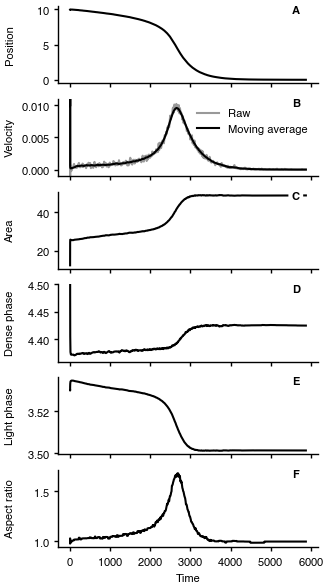

In [6]:
height = 8.5 * 0.35
dense = np.sum(sim.concentration_profile[0]*np.repeat([sim.geometry.mesh.cellVolumes],sim.mask.shape[0],axis=0)*sim.mask,axis=1)/np.sum(np.repeat([sim.geometry.mesh.cellVolumes],sim.mask.shape[0],axis=0)*sim.mask,axis=1)
light = np.sum(sim.concentration_profile[0]*np.repeat([sim.geometry.mesh.cellVolumes],sim.mask.shape[0],axis=0)*(~sim.mask),axis=1)/np.sum(np.repeat([sim.geometry.mesh.cellVolumes],sim.mask.shape[0],axis=0)*~sim.mask,axis=1)
n = 6
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.com[:,0],color=primary)
axes[0].set_ylabel("Position")
axes[0].set_yticks([0,5,10])
axes[1].plot(sim.time,-np.gradient(sim.com[:,0],sim.time),color=secondary,label="Raw")
axes[1].plot(sim.time,-np.gradient(uniform_filter1d(sim.com[:,0],20),sim.time),color=primary,label="Moving average")
axes[1].set_ylabel("Velocity")
axes[1].legend()
axes[1].set_ylim(top=0.011,bottom=-0.001)
area = np.sum(np.repeat([sim.geometry.mesh.cellVolumes],sim.mask.shape[0],axis=0)*sim.mask,axis=1)
axes[2].plot(sim.time,area,color=primary)
axes[2].set_ylabel("Area")
axes[3].plot(sim.time,dense,color=primary)
axes[3].set_ylabel("Dense phase")
axes[3].set_ylim(top=4.5,bottom=4.36)
axes[4].plot(sim.time,light,color=primary)
axes[4].set_ylabel("Light phase")
axes[5].plot(sim.time,sim.aspect_ratio,color=primary)
axes[5].set_ylabel("Aspect ratio")
# axes[6].plot(sim.time,np.sqrt(area/np.pi),color=primary,label="From area")
# axes[6].plot(sim.time,np.mean(sim.radius,axis=1),color=secondary,label="From interface")
# axes[6].legend()
# axes[6].set_ylabel("Radius")
# axes[7].plot(sim.time,sim.radius_variance)
# axes[7].set_ylabel("Var(Radius)")
fig.align_ylabels()
for i, ax in enumerate(axes):
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
fig.savefig(_FIGURE_DIR / "SIFig_QuantifyFlow.pdf",bbox_inches='tight')

In [9]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.02_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_250.0_kd_1.0")
sim.run(end=2200); sim.condensate(); sim.rna(); sim.periodicity(tinit=3000)
sim.time = sim.time[:sim.com.shape[0]]

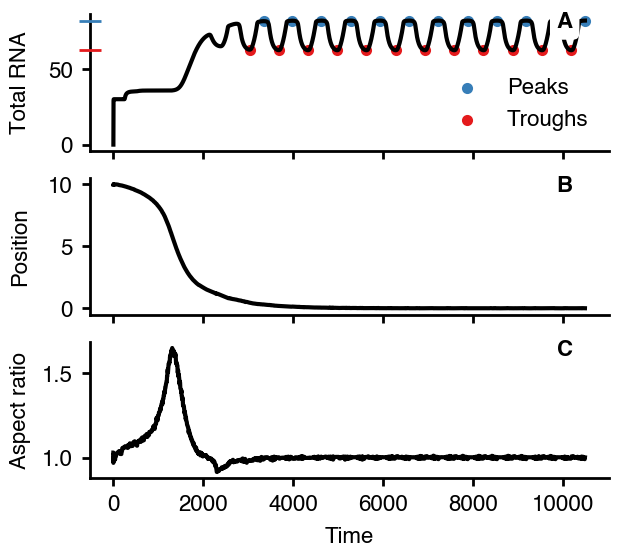

In [39]:
height = 8.5 * 0.3
n = 3
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.rna_amount,color=primary)
axes[0].set_ylabel("Total RNA")
axes[0].scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=accent_positive,label="Peaks")
axes[0].scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=accent_negative,label="Troughs")
axes[0].legend()
axes[1].set_ylabel("Position")
axes[1].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylabel("Aspect ratio")
axes[2].plot(sim.time,sim.aspect_ratio,color=primary)

d = 0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", mew=1, clip_on=False)
axes[0].plot(get_axis_position(axes[0],[0,np.mean(sim.rna_amount[sim.peaks])])[1],
             transform=axes[0].transAxes, color=accent_positive, mec=accent_positive, zorder=3, **kwargs)
axes[0].plot(get_axis_position(axes[0],[0,np.mean(sim.rna_amount[sim.troughs])])[1],
             transform=axes[0].transAxes, color=accent_negative, mec=accent_negative, zorder=3, **kwargs)

fig.align_ylabels()
for i, ax in enumerate(axes):
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsDonut.pdf",bbox_inches='tight')

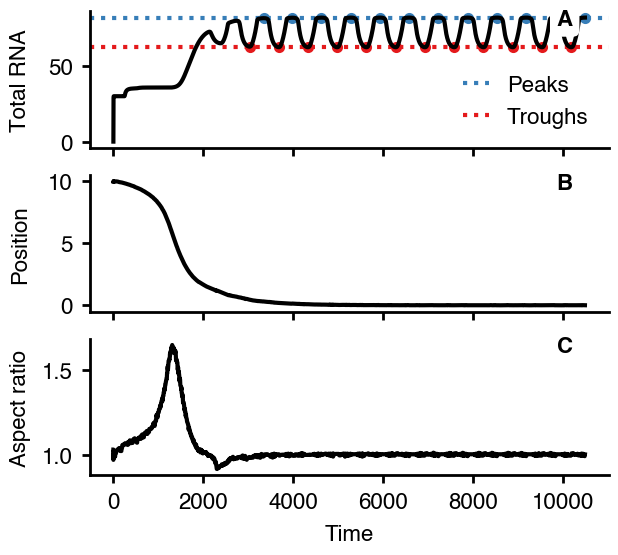

In [40]:
height = 8.5 * 0.3
n = 3
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.rna_amount,color=primary)
axes[0].set_ylabel("Total RNA")
axes[0].axhline(np.mean(sim.rna_amount[sim.peaks]),color=accent_positive,label="Peaks",zorder=0,linestyle=":")
axes[0].axhline(np.mean(sim.rna_amount[sim.troughs]),color=accent_negative,label="Troughs",zorder=0,linestyle=":")
axes[0].scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=accent_positive)
axes[0].scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=accent_negative)
axes[0].legend(handlelength=1.2)
axes[1].set_ylabel("Position")
axes[1].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylabel("Aspect ratio")
axes[2].plot(sim.time,sim.aspect_ratio,color=primary)

fig.align_ylabels()
for i, ax in enumerate(axes):
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsDonut.pdf",bbox_inches='tight')

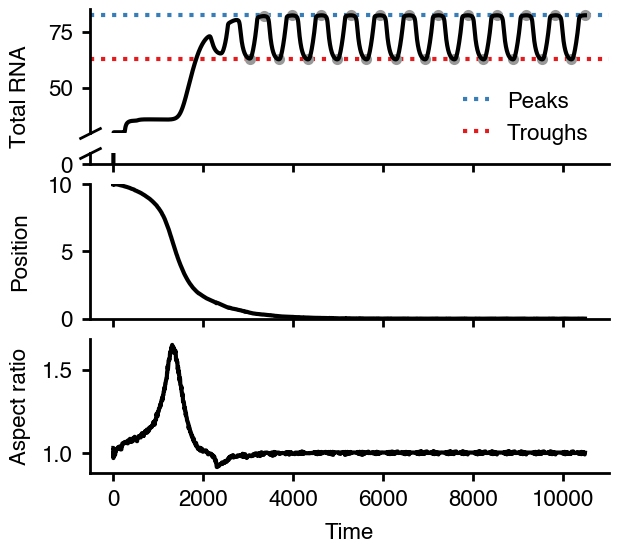

In [10]:
height = 8.5 * 0.3
n = 3
ylim1 = (30,85)
ylim2 = (0,5)
ratio = (np.diff(ylim1)/(np.diff(ylim1)+np.diff(ylim2)))[0]
fig, axes = plt.subplots(n+1,1,sharex=True,gridspec_kw={'height_ratios':[ratio,1-ratio,1,1]})
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].set_ylabel("Total RNA",y=0.3)
for ax in axes[:2]:
    ax.plot(sim.time,sim.rna_amount,color=primary)
    ax.scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=secondary)
    ax.scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=secondary)
axes[0].axhline(np.mean(sim.rna_amount[sim.peaks]),color=accent_positive,label="Peaks",zorder=0,linestyle=":")
axes[0].axhline(np.mean(sim.rna_amount[sim.troughs]),color=accent_negative,label="Troughs",zorder=0,linestyle=":")
axes[0].set_ylim(ylim1)
axes[1].set_ylim(ylim2)
axes[1].set_yticks([0])
axes[0].spines.bottom.set_visible(False)
axes[0].legend(handlelength=1.2, bbox_to_anchor=(1, 0.5))
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axes[0].plot([0], [0], transform=axes[0].transAxes, **kwargs)
axes[1].plot([0], [1], transform=axes[1].transAxes, **kwargs)

axes[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axes[2].set_ylabel("Position")
axes[2].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylim([0,10])
axes[3].set_ylabel("Aspect ratio")
axes[3].plot(sim.time,sim.aspect_ratio,color=primary)
axes[3].set_xticks(np.arange(0,10000+2000,2000))
fig.align_ylabels()


# This contrived logic skips the broken axes
i = 0; skip = False
# for ax in axes:
#     if (i == 1) and not skip: skip = True; continue
#     uc = string.ascii_uppercase[i]
#     ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
#                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
#     i = i+1
fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsDonut.pdf",bbox_inches='tight')

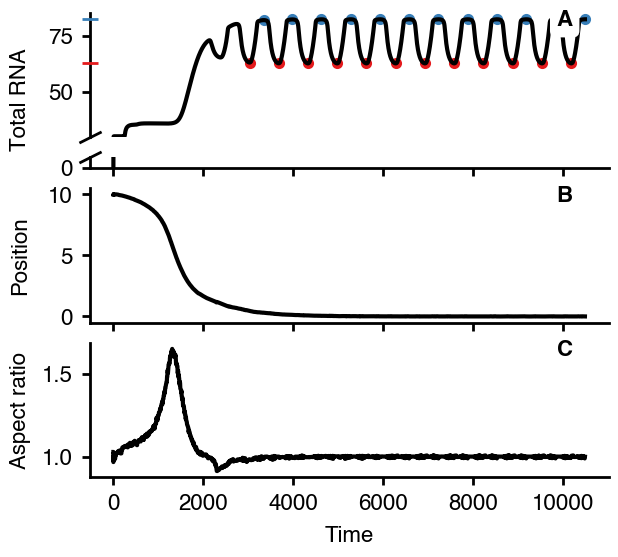

In [42]:
height = 8.5 * 0.3
n = 3
ylim1 = (30,85)
ylim2 = (0,5)
ratio = (np.diff(ylim1)/(np.diff(ylim1)+np.diff(ylim2)))[0]
fig, axes = plt.subplots(n+1,1,sharex=True,gridspec_kw={'height_ratios':[ratio,1-ratio,1,1]})
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].set_ylabel("Total RNA",y=0.3)
for ax in axes[:2]:
    ax.plot(sim.time,sim.rna_amount,color=primary)
    ax.scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=accent_positive,label="Peaks")
    ax.scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=accent_negative,label="Troughs")
axes[0].set_ylim(ylim1)
axes[1].set_ylim(ylim2)
axes[1].set_yticks([0])
axes[0].spines.bottom.set_visible(False)
# axes[0].legend()
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axes[0].plot([0], [0], transform=axes[0].transAxes, **kwargs)
axes[1].plot([0], [1], transform=axes[1].transAxes, **kwargs)

d = 0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", mew=1, clip_on=False)
axes[0].plot(get_axis_position(axes[0],[0,np.mean(sim.rna_amount[sim.peaks])])[1],
             transform=axes[0].transAxes, color=accent_positive, mec=accent_positive, zorder=3, **kwargs)
axes[0].plot(get_axis_position(axes[0],[0,np.mean(sim.rna_amount[sim.troughs])])[1],
             transform=axes[0].transAxes, color=accent_negative, mec=accent_negative, zorder=3, **kwargs)

axes[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axes[2].set_ylabel("Position")
axes[2].plot(sim.time,sim.com[:,0],color=primary)
axes[3].set_ylabel("Aspect ratio")
axes[3].plot(sim.time,sim.aspect_ratio,color=primary)
axes[3].set_xticks(np.arange(0,10000+2000,2000))
fig.align_ylabels()


# This contrived logic skips the broken axes
i = 0; skip = False
for ax in axes:
    if (i == 1) and not skip: skip = True; continue
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    i = i+1
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsDonut.pdf",bbox_inches='tight')

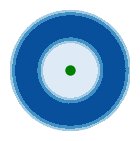

In [16]:
time = sim.peaks[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=3)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
# ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsDonut_DropletPeak")

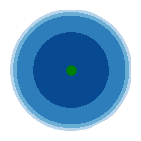

In [15]:
time = sim.troughs[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=3)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
# ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsDonut_DropletTrough")

In [64]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240223_PhaseDiagramHillFaster/M1_1.0_b_-0.25_g_-0.1_c_0.03_k_0.05_kp_0.2_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_250.0_kd_1.0")
sim.run(end=2200); sim.condensate(); sim.rna(); sim.periodicity(tinit=3000);
sim.time = sim.time[:sim.com.shape[0]]

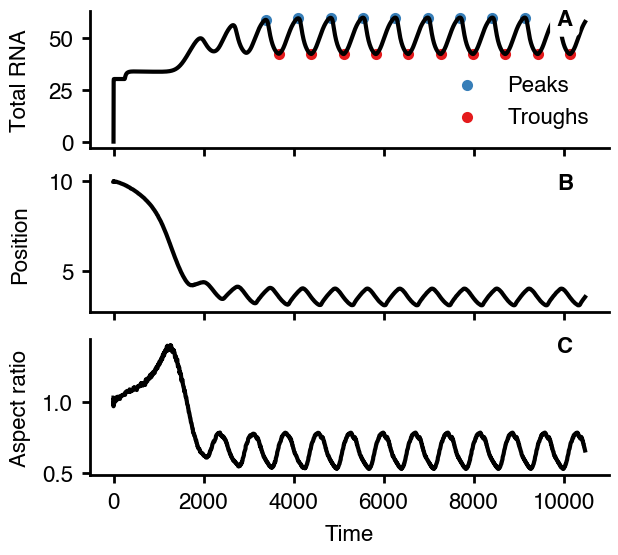

In [31]:
height = 8.5 * 0.3
n = 3
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.rna_amount,color=primary)
axes[0].set_ylabel("Total RNA")
axes[0].scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=accent_positive,label="Peaks")
axes[0].scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=accent_negative,label="Troughs")
axes[0].legend()
axes[1].set_ylabel("Position")
axes[1].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylabel("Aspect ratio")
axes[2].plot(sim.time,sim.aspect_ratio,color=primary)
fig.align_ylabels()
for i, ax in enumerate(axes):
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsBean.pdf",bbox_inches='tight')

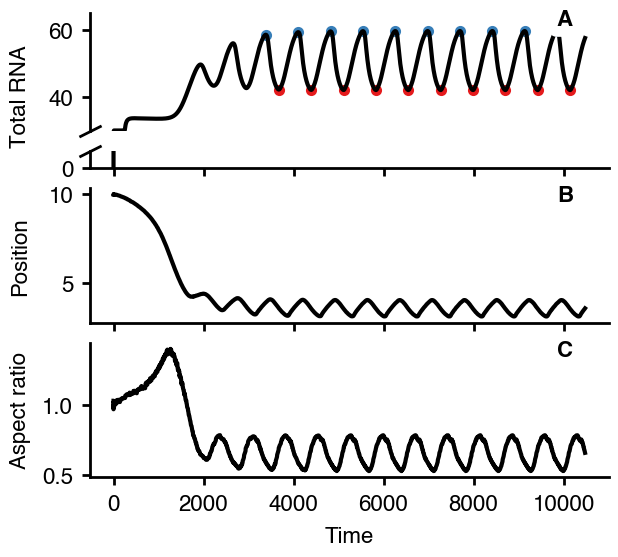

In [32]:
height = 8.5 * 0.3
n = 3
ylim1 = (30,65)
ylim2 = (0,5)
ratio = (np.diff(ylim1)/(np.diff(ylim1)+np.diff(ylim2)))[0]
fig, axes = plt.subplots(n+1,1,sharex=True,gridspec_kw={'height_ratios':[ratio,1-ratio,1,1]})
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].set_ylabel("Total RNA",y=0.3)
for ax in axes[:2]:
    ax.plot(sim.time,sim.rna_amount,color=primary)
    ax.scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=accent_positive,label="Peaks")
    ax.scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=accent_negative,label="Troughs")
axes[0].set_ylim(ylim1)
axes[1].set_ylim(ylim2)
axes[1].set_yticks([0])
axes[0].spines.bottom.set_visible(False)
# axes[0].legend()
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axes[0].plot([0], [0], transform=axes[0].transAxes, **kwargs)
axes[1].plot([0], [1], transform=axes[1].transAxes, **kwargs)
axes[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axes[2].set_ylabel("Position")
axes[2].plot(sim.time,sim.com[:,0],color=primary)
axes[3].set_ylabel("Aspect ratio")
axes[3].plot(sim.time,sim.aspect_ratio,color=primary)
fig.align_ylabels()


# This contrived logic skips the broken axes
i = 0; skip = False
for ax in axes:
    if (i == 1) and not skip: skip = True; continue
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
    i = i+1
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsBean.pdf",bbox_inches='tight')

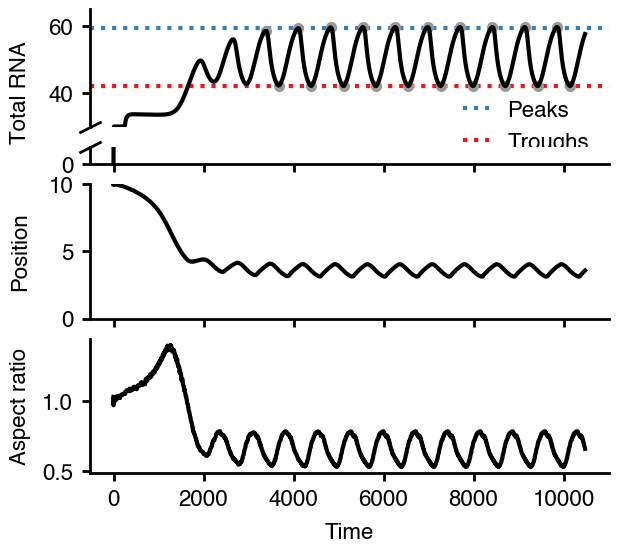

In [67]:
height = 8.5 * 0.3
n = 3
ylim1 = (30,65)
ylim2 = (0,5)
ratio = (np.diff(ylim1)/(np.diff(ylim1)+np.diff(ylim2)))[0]
fig, axes = plt.subplots(n+1,1,sharex=True,gridspec_kw={'height_ratios':[ratio,1-ratio,1,1]})
fig.set_size_inches(cm2inch(8.5,height*n))
axes[-1].set_xlabel("Time")
axes[0].set_ylabel("Total RNA",y=0.3)
for ax in axes[:2]:
    ax.plot(sim.time,sim.rna_amount,color=primary)
    ax.scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=secondary)
    ax.scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=secondary)
axes[0].axhline(np.mean(sim.rna_amount[sim.peaks]),color=accent_positive,label="Peaks",zorder=0,linestyle=":")
axes[0].axhline(np.mean(sim.rna_amount[sim.troughs]),color=accent_negative,label="Troughs",zorder=0,linestyle=":")
axes[0].set_ylim(ylim1)
axes[1].set_ylim(ylim2)
axes[1].set_yticks([0])
axes[0].spines.bottom.set_visible(False)
axes[0].legend(handlelength=1.2, bbox_to_anchor=(1.0, 0.4))
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
axes[0].plot([0], [0], transform=axes[0].transAxes, **kwargs)
axes[1].plot([0], [1], transform=axes[1].transAxes, **kwargs)

axes[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
axes[2].set_ylabel("Position")
axes[2].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylim([0,10])
axes[3].set_ylabel("Aspect ratio")
axes[3].plot(sim.time,sim.aspect_ratio,color=primary)
axes[3].set_xticks(np.arange(0,10000+2000,2000))
fig.align_ylabels()


# This contrived logic skips the broken axes
i = 0; skip = False
# for ax in axes:
#     if (i == 1) and not skip: skip = True; continue
#     uc = string.ascii_uppercase[i]
#     ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
#                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
#     i = i+1
fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsBean.pdf",bbox_inches='tight')

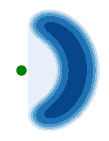

In [26]:
time = sim.peaks[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=5)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsBean_DropletPeak")

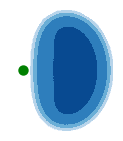

In [19]:
time = sim.troughs[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=3)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsBean_DropletTrough")

NameError: name 'get_axis_limits' is not defined

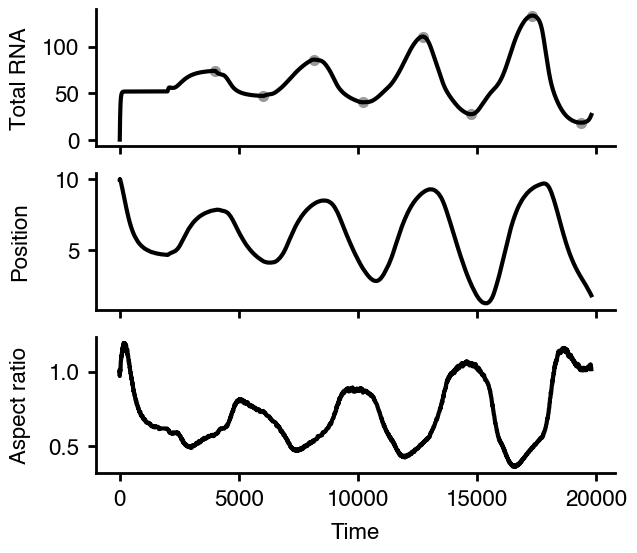

In [7]:
# sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240717_ExploreDelayReentrantDegradationHilLLargerDistHigherInteraction/M1_1.0_b_-0.25_g_-0.5_c_0.4_k_0.05_kp_0.0137791_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_2000.0_kd_0.04")
# sim.run(end=-1); sim.condensate(); sim.rna(); sim.periodicity(tinit=3000);
# sim.time = sim.time[:sim.com.shape[0]]
height = 8.5 * 0.3
n = 3
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(8.5*_CM,height*n*_CM)
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.rna_amount,color=primary)
axes[0].set_ylabel("Total RNA")
axes[0].scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=secondary)
axes[0].scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=secondary)
axes[0].legend(handlelength=1.2)
axes[1].set_ylabel("Position")
axes[1].plot(sim.time,sim.com[:,0],color=primary)
axes[2].set_ylabel("Aspect ratio")
axes[2].plot(sim.time,sim.aspect_ratio,color=primary)

fig.align_ylabels()
for i, ax in enumerate(axes):
    uc = string.ascii_uppercase[i]
    ax.annotate(f'{uc}', xy=get_axis_limits(ax), weight='bold',
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
# fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsDonut.pdf",bbox_inches='tight')

In [68]:
sim = simDir("/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240718_LowDegradationHighInteraction/M1_1.0_b_-0.25_g_-0.5_c_0.4_k_0.05_kp_0.0137791_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_2000.0_kd_0.04")
sim.run(end=-1); sim.condensate(); sim.rna(); sim.periodicity(tinit=18000);
sim.time = sim.time[:sim.com.shape[0]]

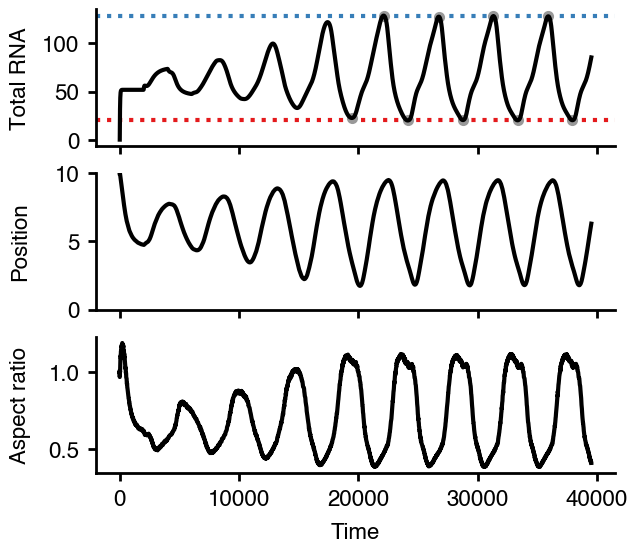

In [70]:
height = 8.5 * 0.3
n = 3
fig, axes = plt.subplots(n,1,sharex=True)
fig.set_size_inches(8.5*_CM,height*n*_CM)
axes[-1].set_xlabel("Time")
axes[0].plot(sim.time,sim.rna_amount,color=primary)
axes[0].set_ylabel("Total RNA")
axes[0].axhline(np.mean(sim.rna_amount[sim.peaks]),color=accent_positive,label="Peaks",zorder=0,linestyle=":")
axes[0].axhline(np.mean(sim.rna_amount[sim.troughs]),color=accent_negative,label="Troughs",zorder=0,linestyle=":")
axes[0].scatter(sim.time[sim.peaks],sim.rna_amount[sim.peaks],color=secondary)
axes[0].scatter(sim.time[sim.troughs],sim.rna_amount[sim.troughs],color=secondary)
# axes[0].legend(handlelength=1.2, loc=(0.1, 0.7))
axes[1].set_ylabel("Position")
axes[1].set_ylim([0,10])
axes[1].plot(sim.time,sim.com[:,0],color=primary)
rxn_gaussian = np.exp(-np.sum(sim.xy**2,axis=1)/(2*sim.params["reaction_sigma"]**2))
conc = sim.concentration_profile[0]-sim.params["initial_values"][0]
prod = np.sum(conc*rxn_gaussian,axis=1)
axes[2].set_ylabel("Aspect ratio")
axes[2].plot(sim.time,sim.aspect_ratio,color=primary)
fig.align_ylabels()
# for i, ax in enumerate(axes):
#     uc = string.ascii_uppercase[i]
#     ax.annotate(f'{uc}', xy=(0.9,0.9), weight='bold', xycoords="axes fraction",
#                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white'))
fig.savefig(_FIGURE_DIR / "SIFig_QuantifyOscillationsLongRange.pdf",bbox_inches='tight')

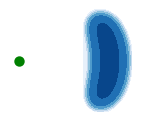

In [17]:
time = sim.peaks[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=5)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsLongRange_DropletPeak")

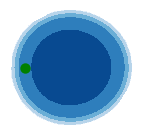

In [18]:
time = sim.troughs[-1]
fig,ax = plt.subplots(figsize=(2*_CM,2*_CM))
xy = sim.xy[sim.mask[time,:],:]
conc = sim.concentration_profile[0][time][sim.mask[time,:]]
shape(xy,conc,ax,levels=3)
ax.scatter(x=0, y=0, s=30, color='green',marker=".")
ax.set_xlim(left=-1)
plt.savefig(_FIGURE_DIR/"SIFig_QuantifyOscillationsLongRange_DropletTrough")